In [82]:
import sklearn.metrics
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set_style("darkgrid")

In [83]:
df = pd.read_csv('summarized.csv')
df.head()

,Unnamed: 0,type,value,total_seconds,date
0,0,languages,Python,12983.749285,2016-10-22
1,1,languages,Other,8752.893072,2016-10-22
2,2,languages,PowerShell,2375.408296,2016-10-22
3,3,languages,Markdown,412.366297,2016-10-22
4,4,languages,Batchfile,284.513934,2016-10-22


In [84]:
df['date'] = pd.to_datetime(df['date'])

grouped = df[df.type == 'languages'].groupby(['date', 'value'])['total_seconds'].sum()
unstacked = grouped.unstack('value')
cumulative = unstacked.cumsum().ffill()
cumulative.head()

value,.env file,AMPL,AUTO_DETECTED,ActionScript,ActionScript 3,AiIgnore file,Apache Config,Assembly,Assembly file,Bash,...,reStructuredText,sh,sqlfluff config,sshconfig,systemd,textmate,tmux,tsconfig,xf86conf,yarn.lock
date,,,,,,,,,,,,,,,,,,,,,
2016-10-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1475.824889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1475.824889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1478.723866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
cumulative.tail()

value,.env file,AMPL,AUTO_DETECTED,ActionScript,ActionScript 3,AiIgnore file,Apache Config,Assembly,Assembly file,Bash,...,reStructuredText,sh,sqlfluff config,sshconfig,systemd,textmate,tmux,tsconfig,xf86conf,yarn.lock
date,,,,,,,,,,,,,,,,,,,,,
2025-08-02,6211.360696,336.853323,928.723,506.267295,226.006399,51.12,1.165864,866.14652,5.292,242934.199051,...,6.110232,1406.123128,2.076,1010.027214,51.16846,8714.312823,108.024231,1169.722,365.0,14.747
2025-08-04,6223.484696,336.853323,928.723,506.267295,226.006399,51.12,1.165864,866.14652,5.292,242943.902051,...,6.110232,1406.123128,2.076,1010.027214,51.16846,8714.312823,108.024231,1169.722,365.0,14.747
2025-08-05,6223.484696,336.853323,928.723,506.267295,226.006399,51.12,1.165864,866.14652,5.292,242943.902051,...,6.110232,1406.123128,2.076,1010.027214,51.16846,8714.940823,108.024231,1169.722,365.0,14.747
2025-08-06,6223.484696,336.853323,928.723,506.267295,226.006399,51.12,1.165864,866.14652,5.292,242943.902051,...,6.110232,1406.123128,2.076,1010.027214,51.16846,8714.940823,108.024231,1169.722,365.0,14.747
2025-10-25,6223.484696,336.853323,928.723,506.267295,226.006399,51.12,1.165864,866.14652,5.292,245401.531051,...,6.110232,1406.123128,2.076,1010.027214,51.16846,8714.940823,108.024231,1169.722,365.0,14.747


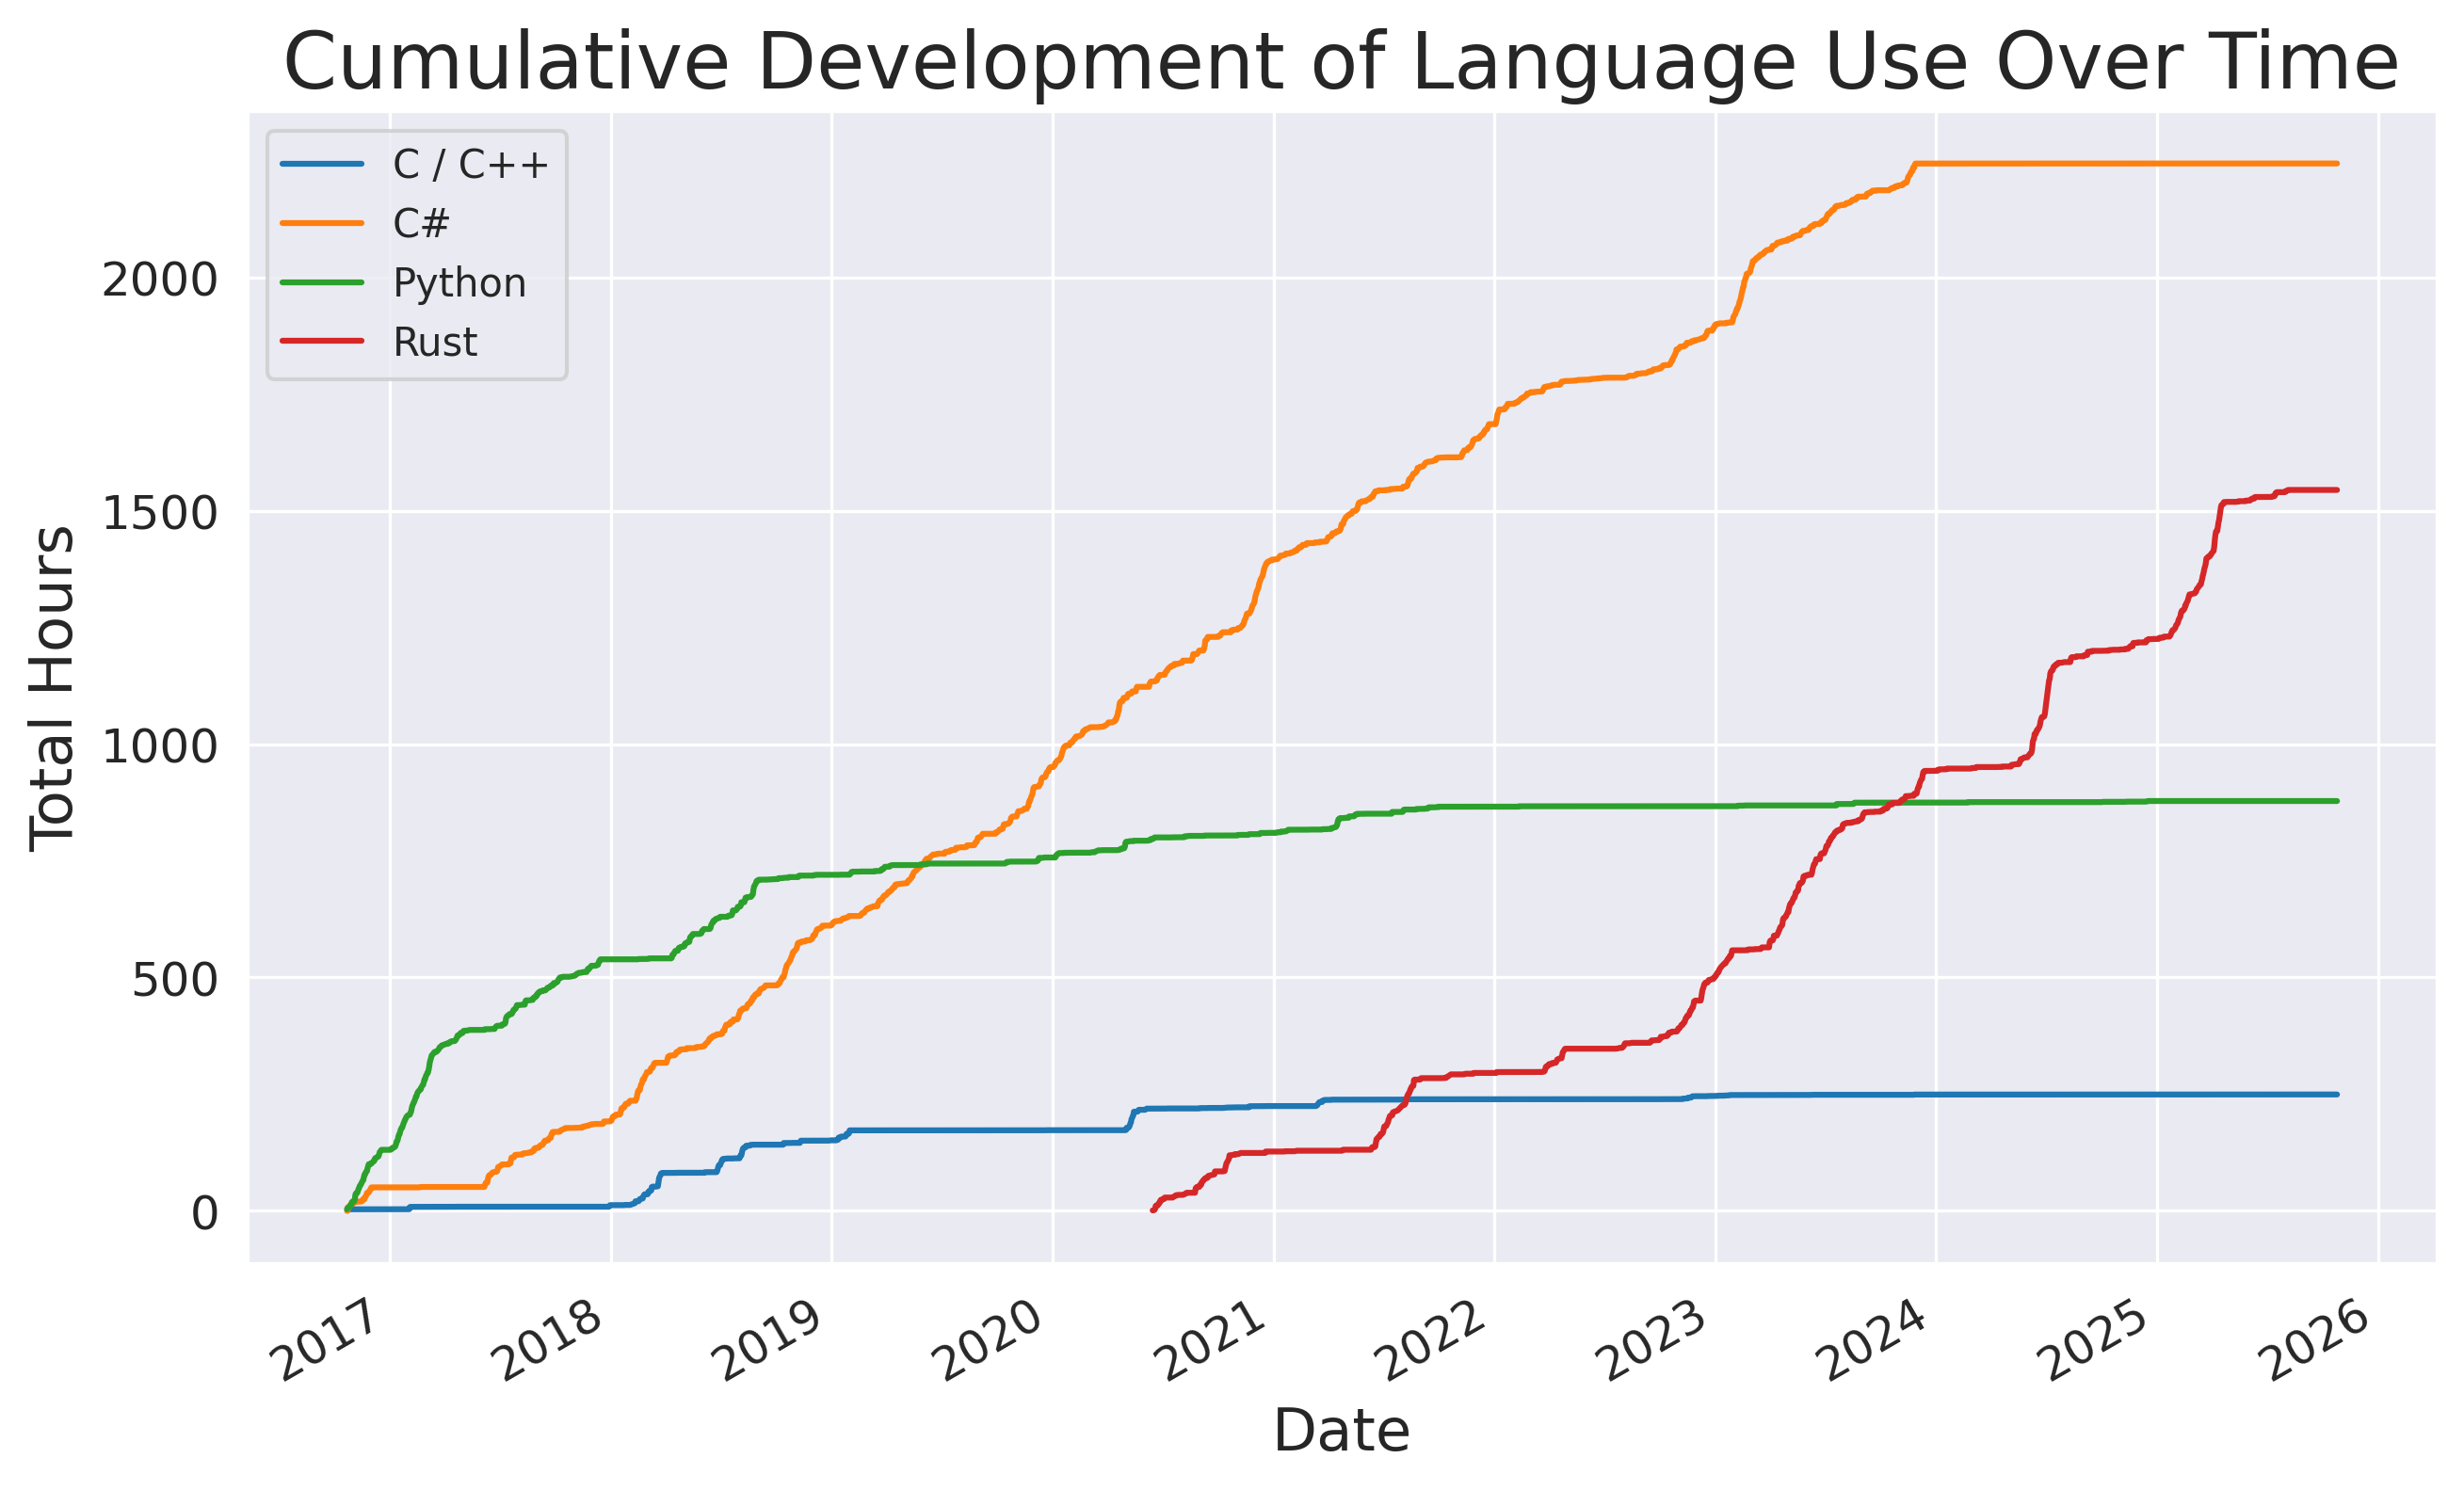

In [86]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Style elements
plt.grid(True)

# Filter columns with final cumulative sum that is high enough to be interesting
# interesting_cols = cumulative.columns[cumulative.iloc[-1] >= 0.5e6]
cumulative['C / C++'] = cumulative['C'] + cumulative['C++']
interesting_cols = ['C / C++', 'C#', 'Python', 'Rust']
filtered = cumulative[interesting_cols]
filtered = filtered / 3600
filtered.plot(kind = 'line', ax=ax)

# Set Title & Labels with increased font size
ax.set_title("Cumulative Development of Language Use Over Time", fontsize=20)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Total Hours', fontsize=15)

# Increase tick label size
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Enable legend
ax.legend()

# Display the plot
plt.show()

Summing up the last row gives the total amount of time.

In [87]:
cumulative = cumulative.drop(columns = ['C / C++'])

In [88]:
total_seconds = cumulative.iloc[-1].sum()
total_seconds

27390753.77423929

In [89]:
total_hours = total_seconds / 3600
total_hours

7608.54271506647

In [90]:
working_days = total_hours / 8
working_days

951.0678393833088

In [91]:
working_years = working_days / 250
working_years

3.804271357533235

This boils down to 27 million seconds of coding, which is approximately 3.8 years of programming work, nonstop, assuming an 8 hours working day with 250 working days per year.

In [92]:
observed_days = (cumulative.index.max() - cumulative.index.min()).days
observed_days

3290

In [93]:
observed_days / 365

9.013698630136986

## Analyzing C# language use from 2017 to 2024

During these years I have worked primarily with the C# language both professionally and privately.

In [94]:
csharp_range = filtered.loc["2017-01-01":"2024-01-01"]
csharp = csharp_range['C#']

Y = csharp.iloc[:].values.reshape(-1, 1)
X = (pd.Series(csharp_range.index.to_series().values).astype('int64').values/1000).reshape(-1, 1) # np.linspace(0, len(Y), len(Y)).reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

In [95]:
estimated = pd.concat([pd.Series(Y.reshape(-1)), pd.Series(Y_pred.reshape(-1))], axis=1, ignore_index=True).set_index(csharp.index)
estimated.rename(columns={0: 'C# Actual', 1: 'C# Predicted'}, inplace=True)
estimated['C# Delta'] = estimated['C# Actual'] - estimated['C# Predicted']
estimated.head()

,C# Actual,C# Predicted,C# Delta
date,,,
2017-01-02,50.317133,-65.516842,115.833975
2017-01-04,50.317133,-63.659237,113.976370
2017-01-05,50.317133,-62.730434,113.047567
2017-01-06,50.317133,-61.801631,112.118764
2017-01-07,50.317133,-60.872828,111.189961


In [96]:
estimated[['C# Predicted', 'C# Actual', 'C# Delta']].plot();

In [97]:
r2_score(estimated['C# Actual'], estimated['C# Predicted'])

0.9951409211362914

The R² score for the prediction is about 0.99, indicating that 99% of the variability of the C# coding time can be explained by the linear model.

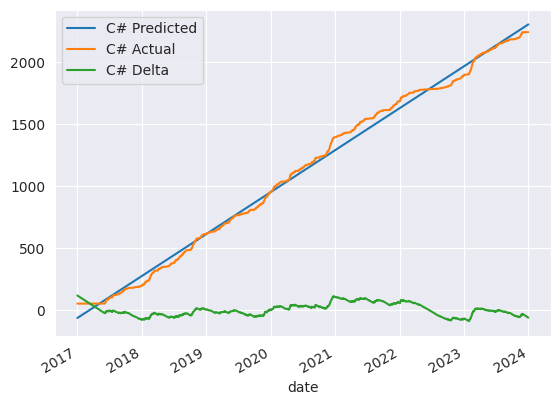

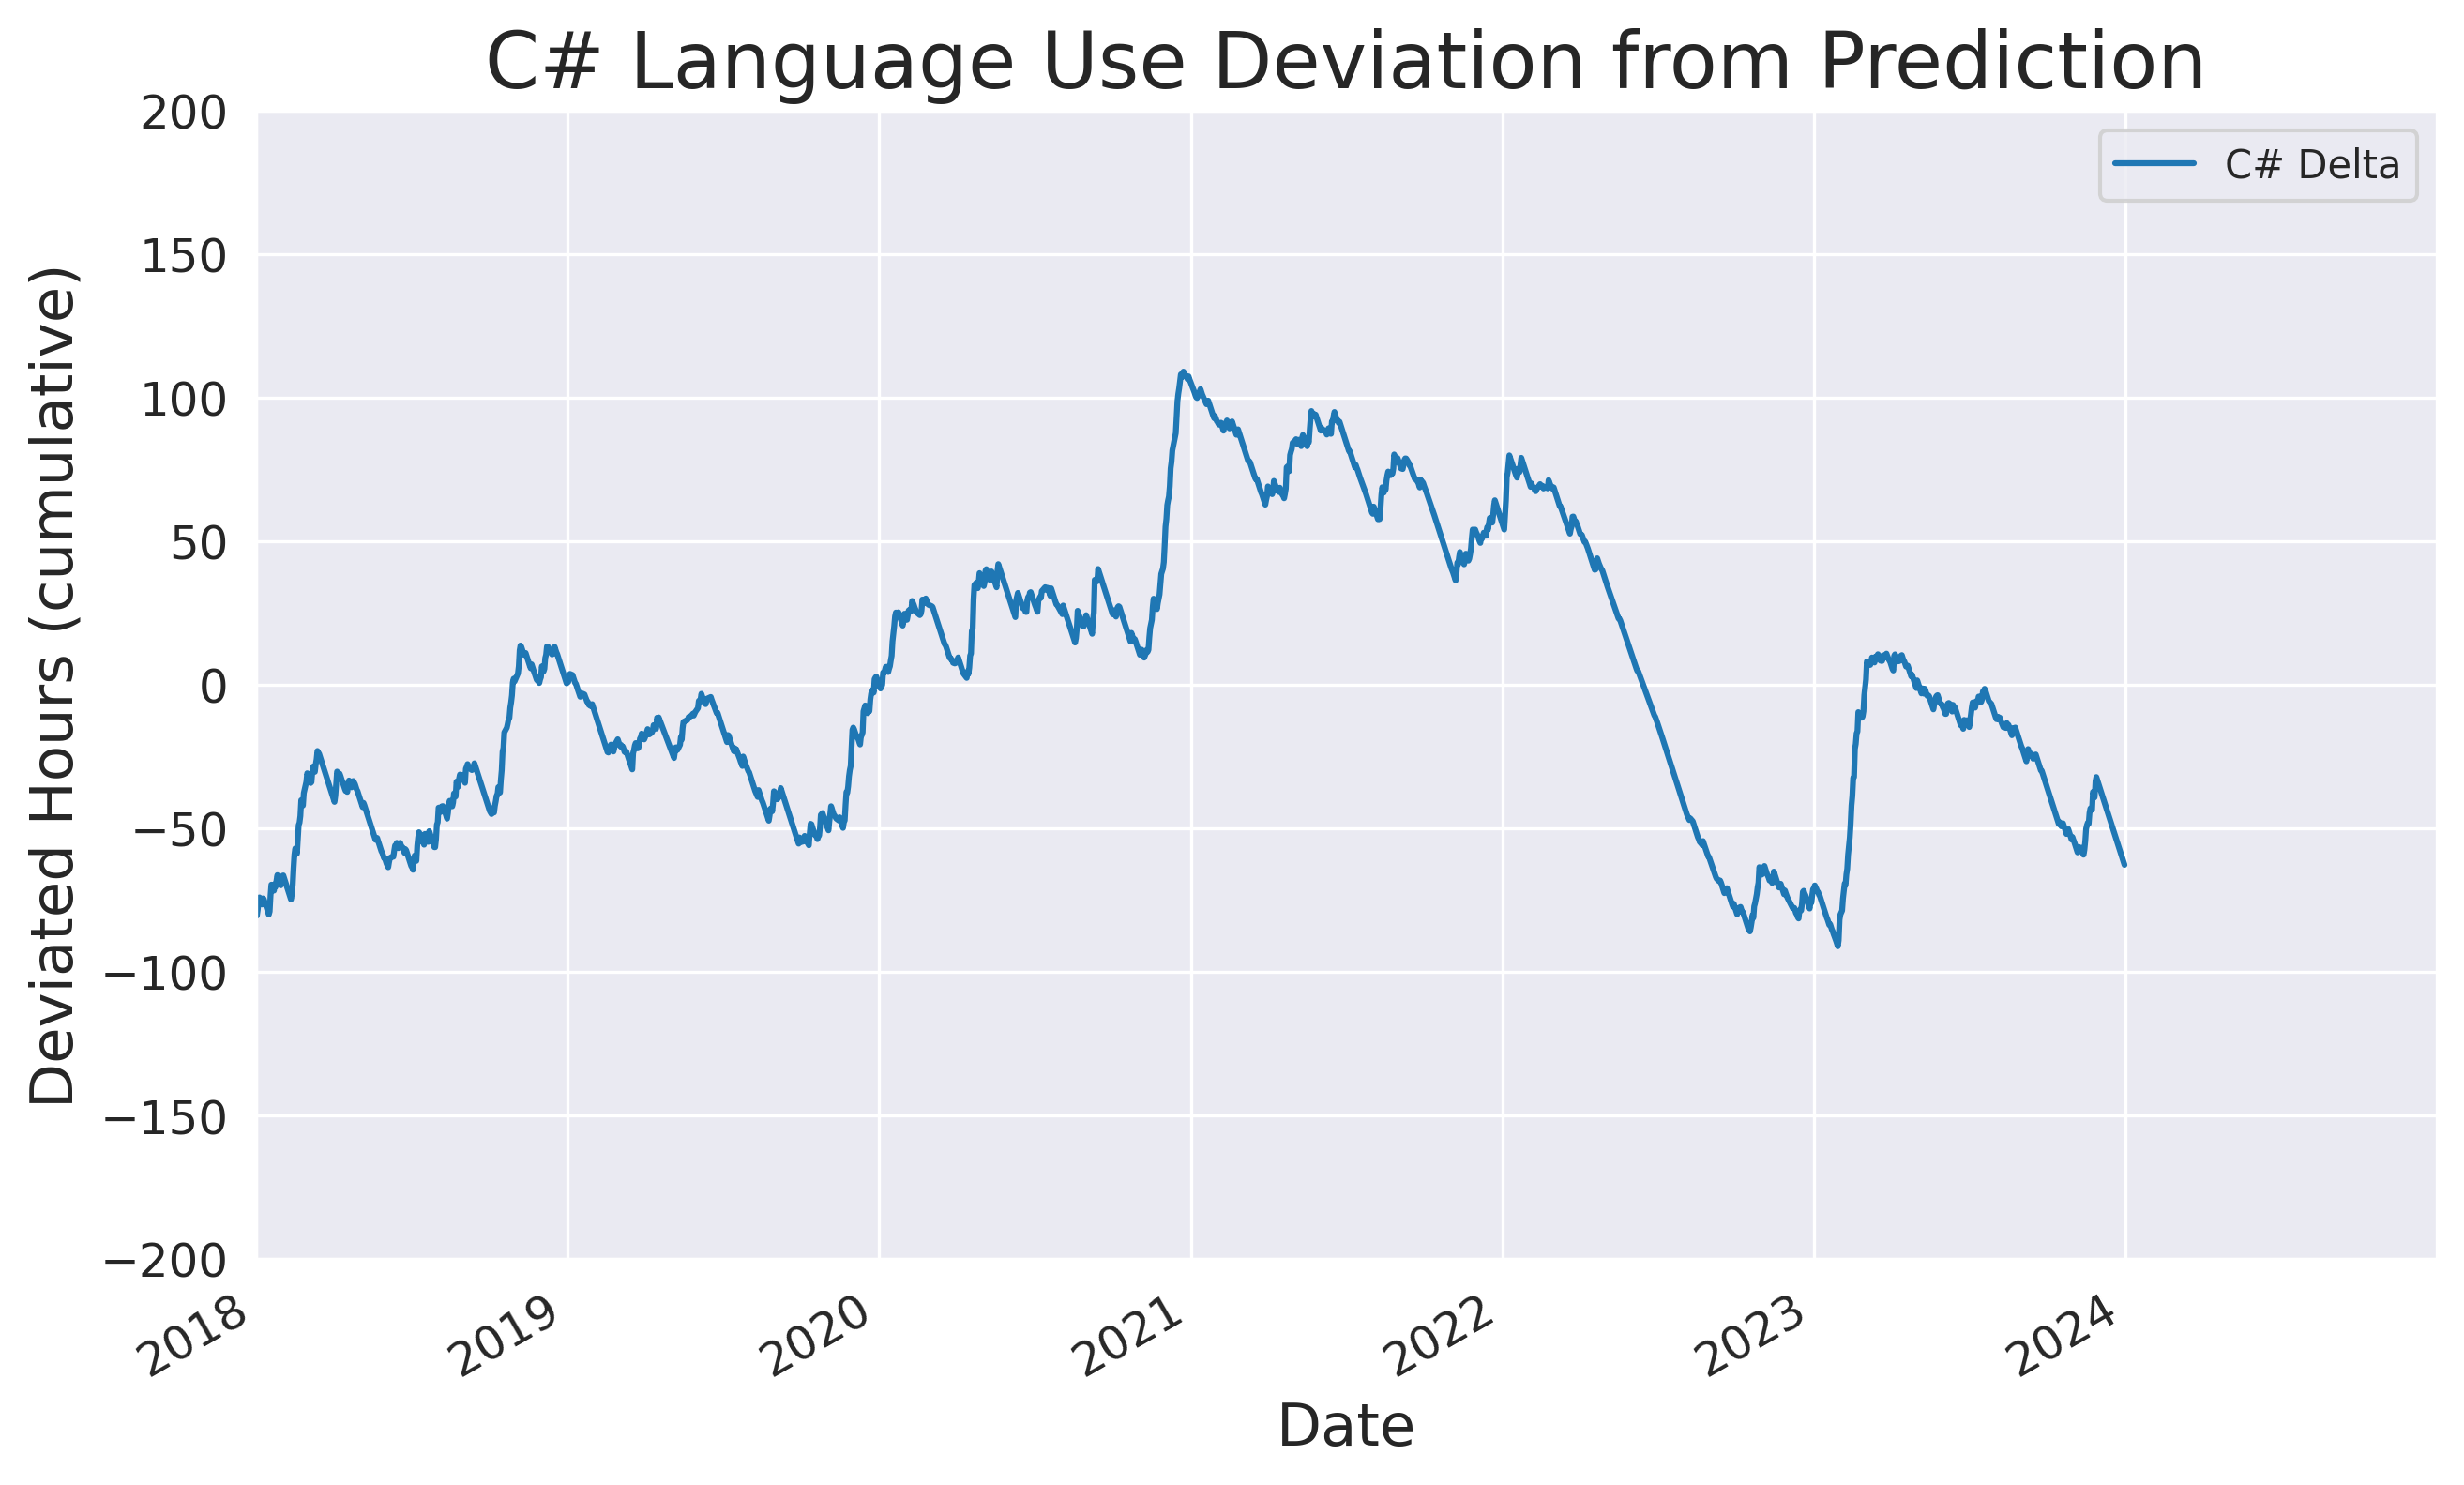

In [98]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Style elements
plt.grid(True)

estimated['C# Delta'].plot(kind = 'line', ax=ax)

# Set Title & Labels with increased font size
ax.set_title("C# Language Use Deviation from Prediction", fontsize=20)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Deviated Hours (cumulative)', fontsize=15)

# Increase tick label size
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Limit to valid range
plt.xlim(datetime.date(2018, 1, 1), datetime.date(2024, 12, 31))
plt.ylim([-200, 200])

# Enable legend
ax.legend()

# Display the plot
plt.show()

The switch to home office in 2020 resulted in more code being written (presumably due to less office space distractions). Not surprisingly, late 2022 was a period of strong burnout symptoms for me.

The seasonality in the pattern is worth a second look.

## 🦀 The Rise of Rust

In 2020 I [began experimenting with Rust](https://github.com/sunsided/rust-ffi-experiments) which soon turned out to be a ~~love eternal~~ big area of interest; since 2025, I have been working with Rust professionally.

In [99]:
rust_range = filtered.loc["2020-01-01":"2025-01-01"].dropna()
rust = rust_range['Rust']

Y = rust.iloc[:].values.reshape(-1, 1)
X = (pd.Series(rust_range.index.to_series().values).astype('int64').values/1000).reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

estimated = pd.concat([pd.Series(Y.reshape(-1)), pd.Series(Y_pred.reshape(-1))], axis=1, ignore_index=True).set_index(rust.index)
estimated.rename(columns={0: 'Rust Actual', 1: 'Rust Predicted'}, inplace=True)
estimated['Rust Delta'] = estimated['Rust Actual'] - estimated['Rust Predicted']

In [100]:
estimated[['Rust Predicted', 'Rust Actual', 'Rust Delta']].plot();

In [101]:
r2_score(estimated['Rust Actual'], estimated['Rust Predicted'])

0.9526175776424447

Again with a R² score of 0.95 we can say that my Rust use is indeed predictable by a linear approximator.

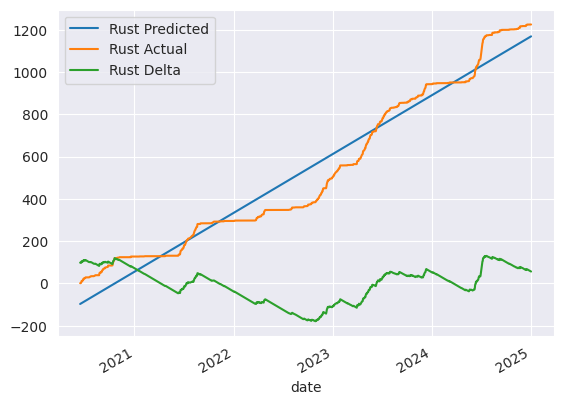

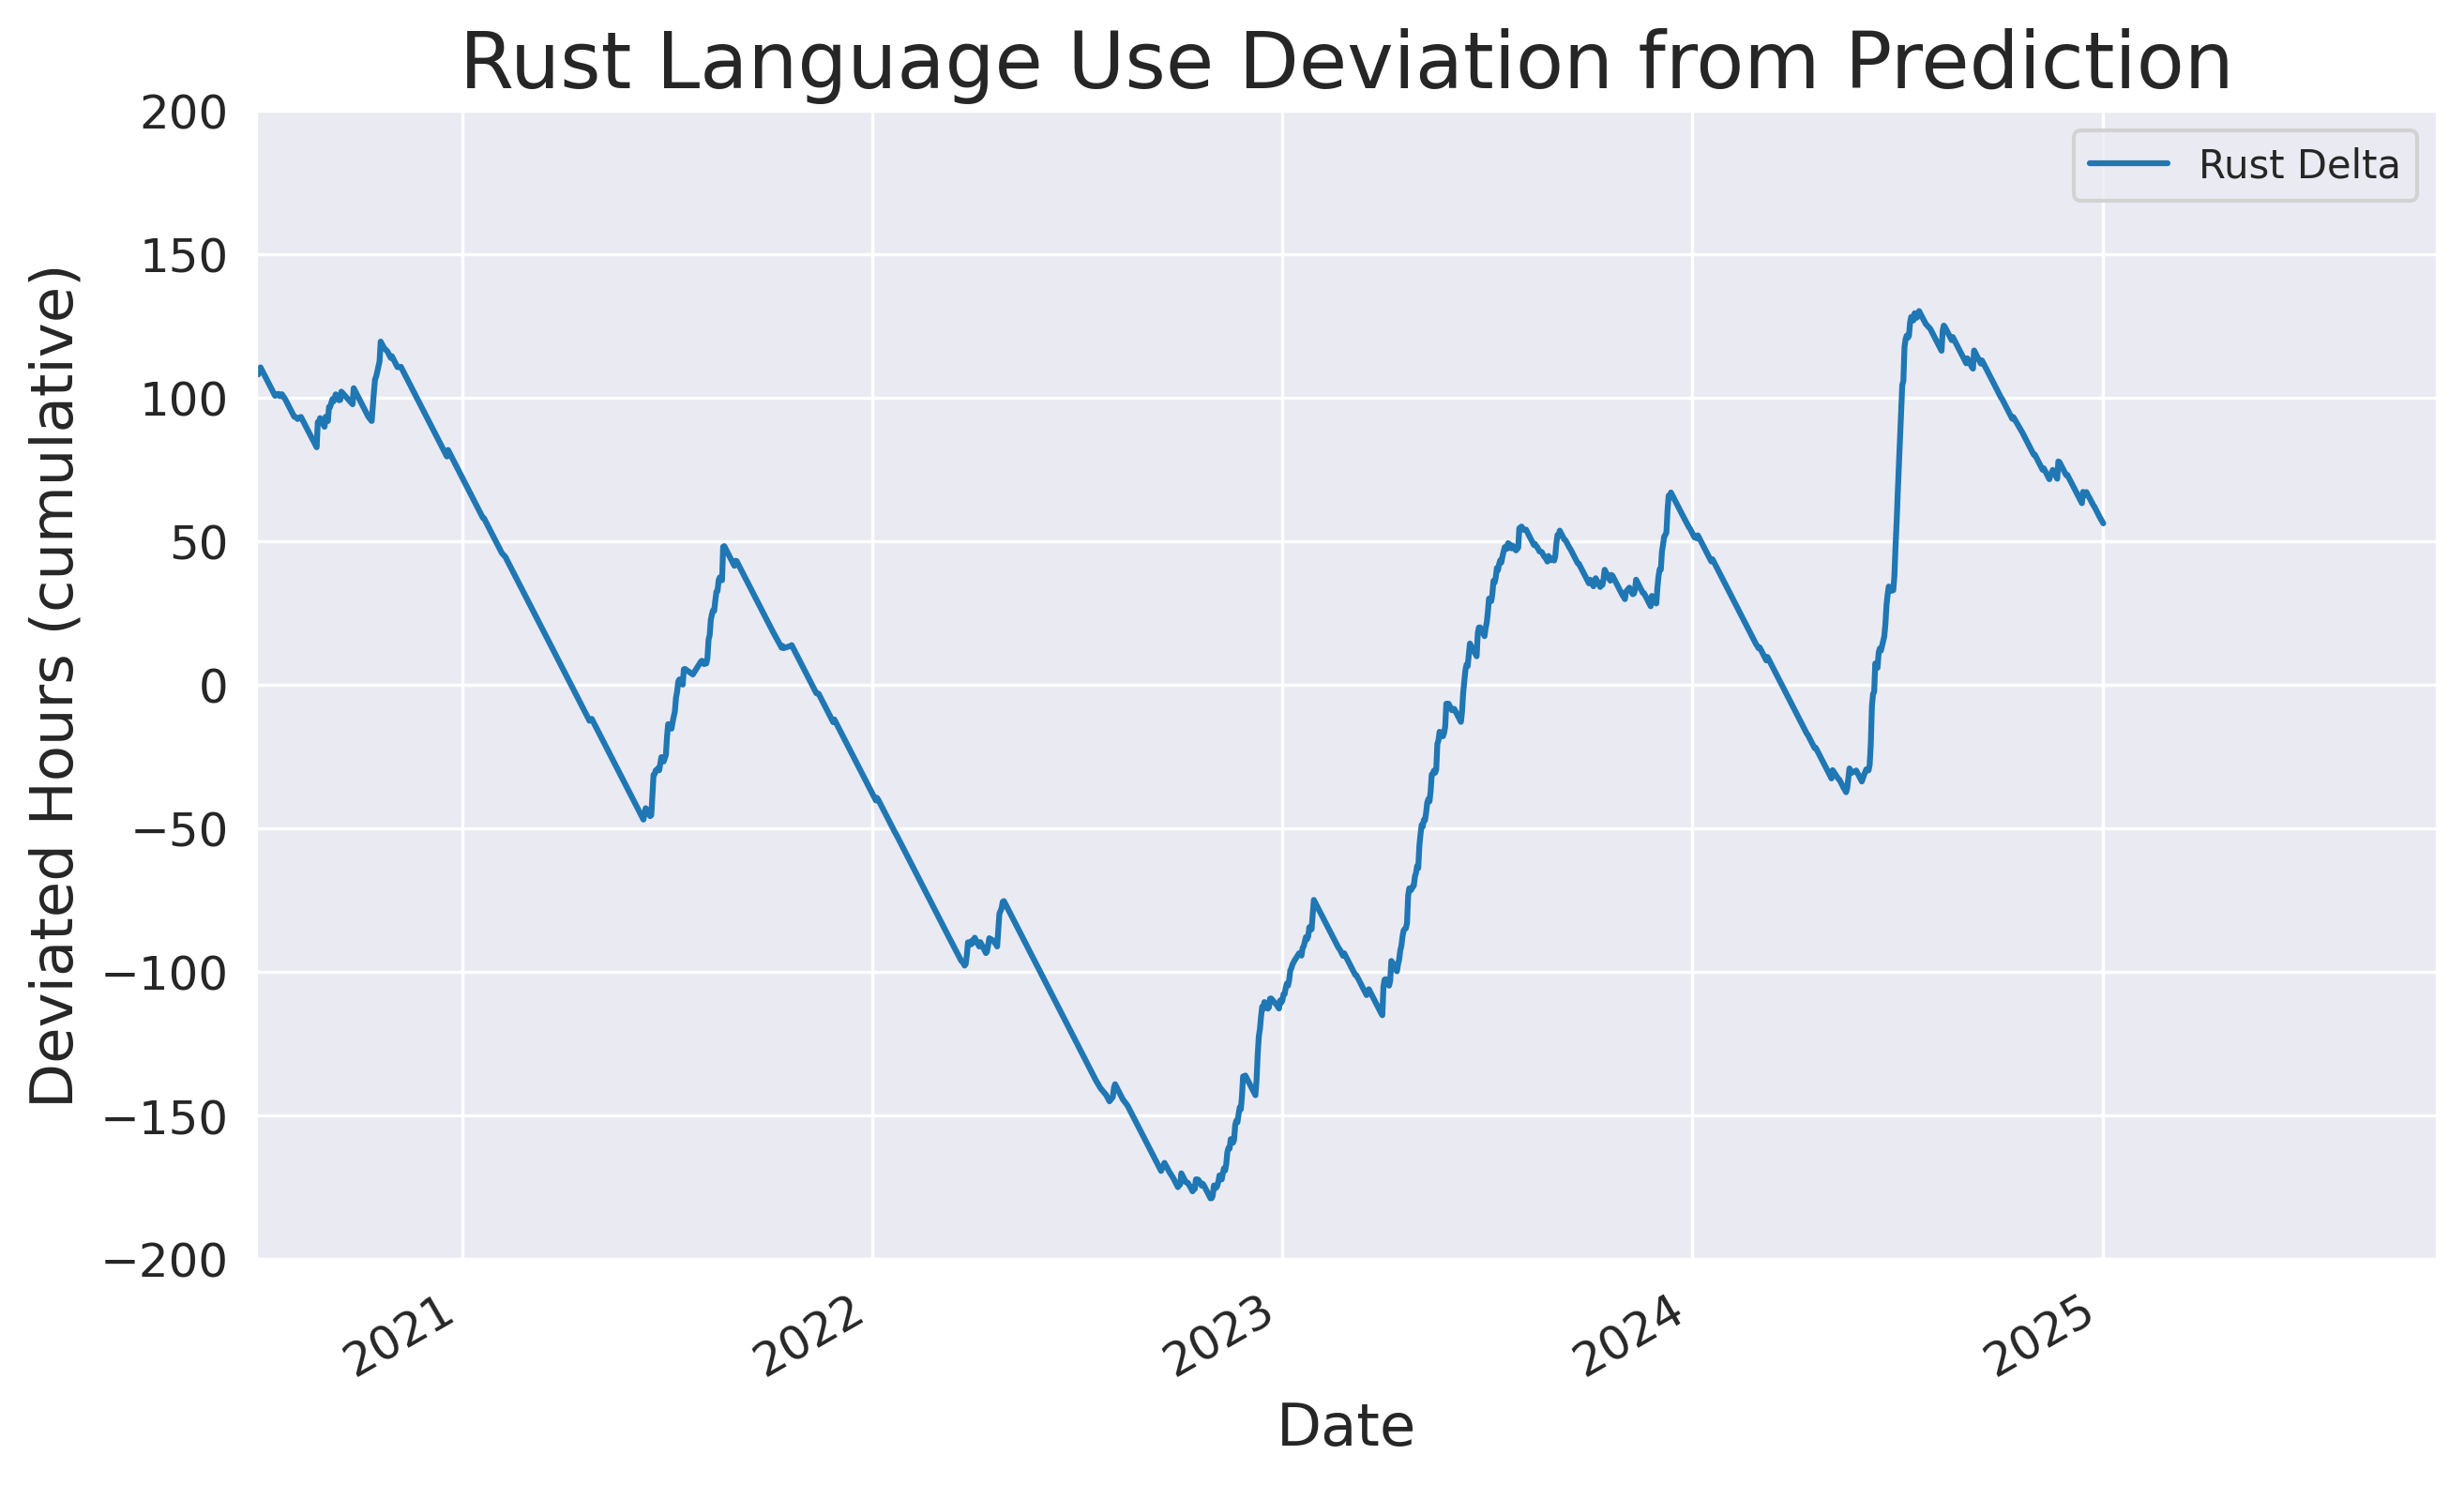

In [102]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Style elements
plt.grid(True)

estimated['Rust Delta'].plot(kind = 'line', ax=ax)

# Set Title & Labels with increased font size
ax.set_title("Rust Language Use Deviation from Prediction", fontsize=20)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Deviated Hours (cumulative)', fontsize=15)

# Increase tick label size
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Limit to valid range
plt.xlim(datetime.date(2020, 7, 1), datetime.date(2025, 10, 25))
plt.ylim([-200, 200])

# Enable legend
ax.legend()

# Display the plot
plt.show()